# Linear Regression Model on WineQualityTest DataSet

Importing Libraries 


In [100]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [101]:
wines_df = pd.read_csv('/content/WineQT.csv')

Cleaning the Data


In [102]:
wines_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [103]:
wines_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [104]:
wines_df=wines_df.drop_duplicates()
wines_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

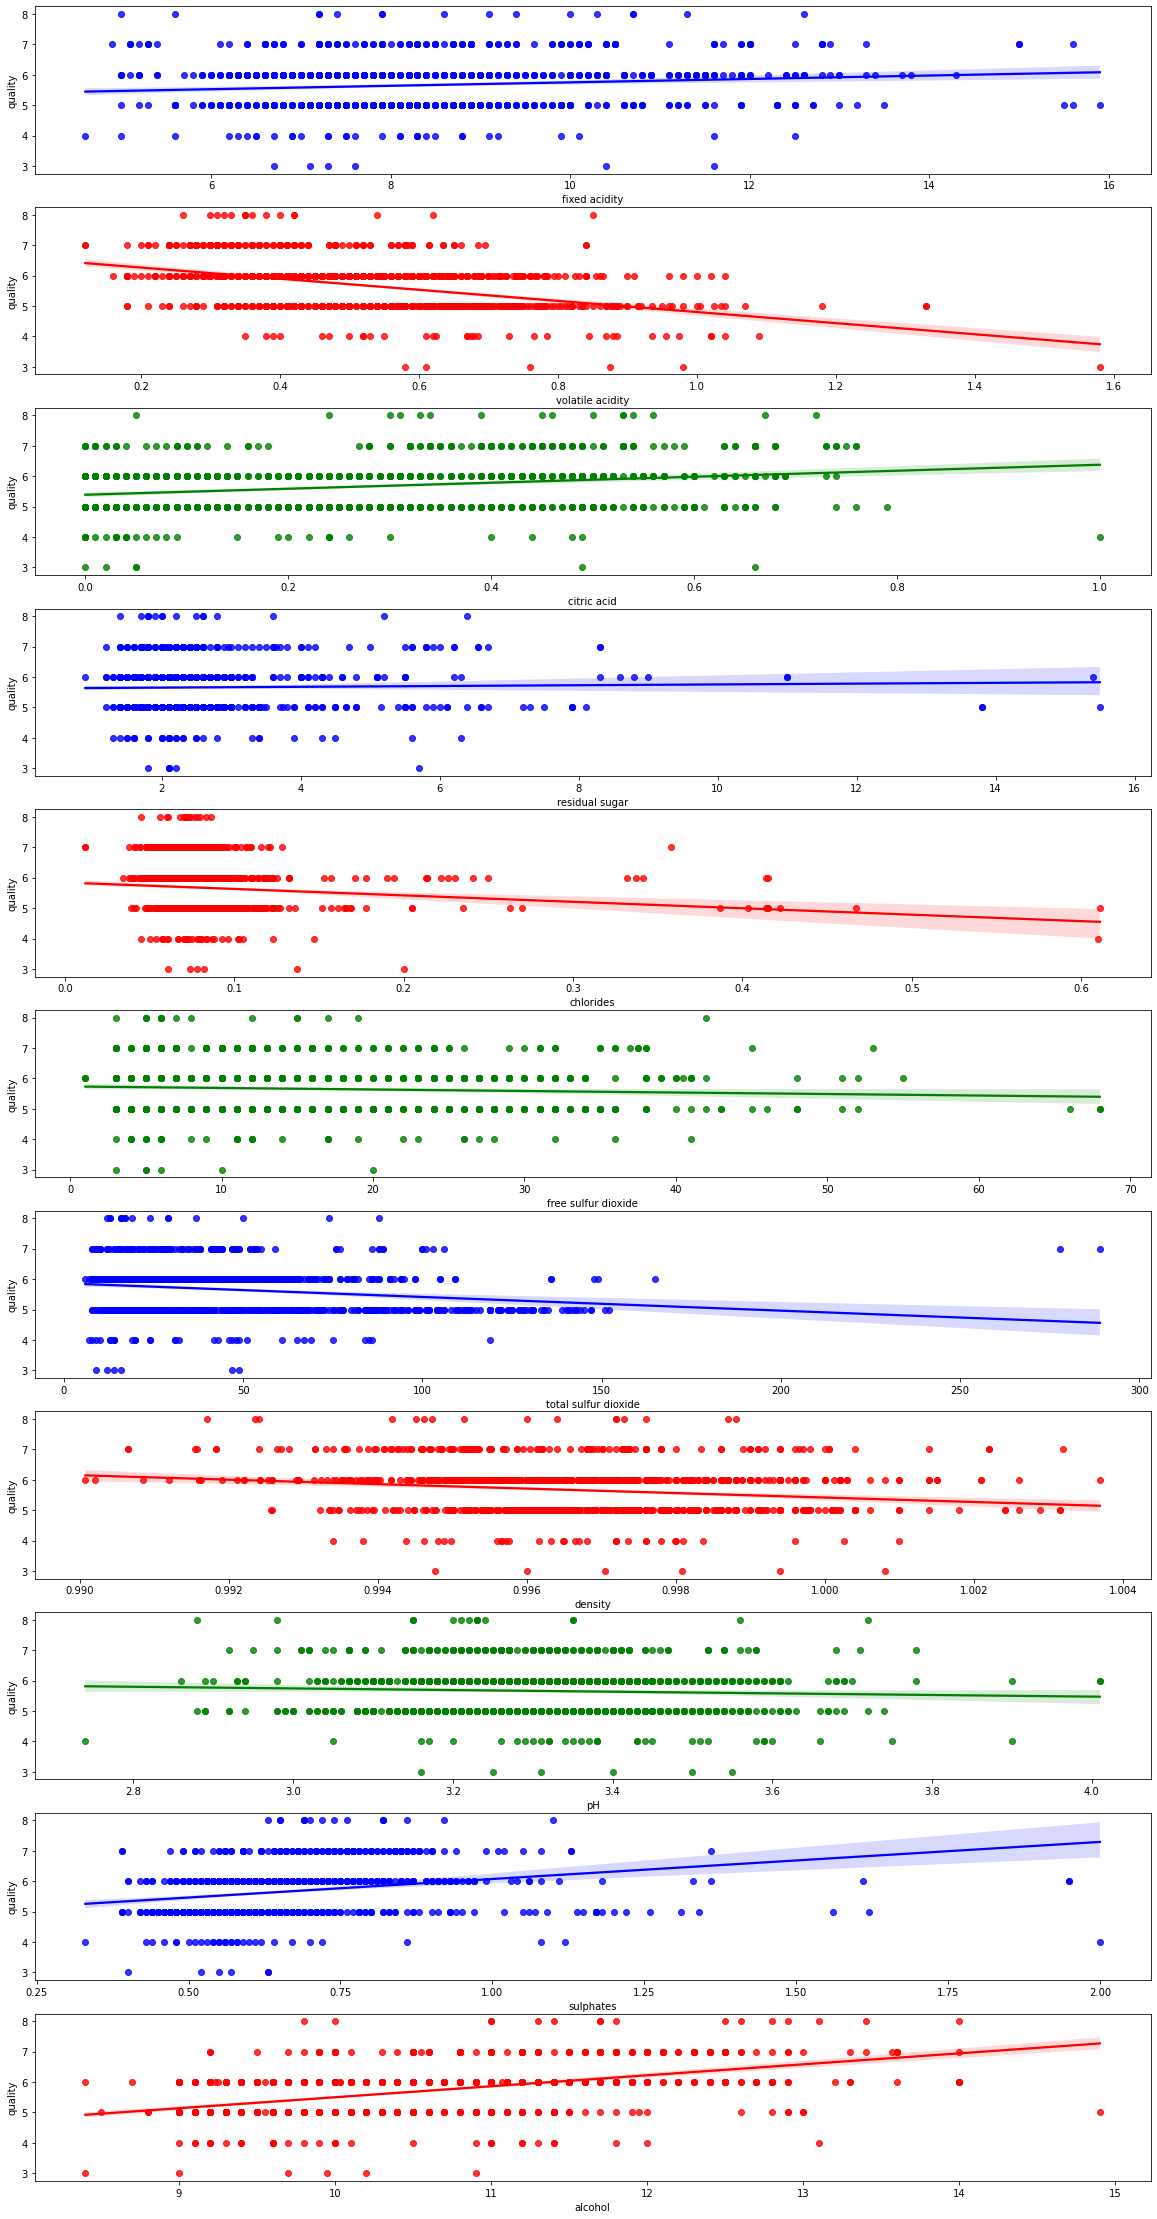

In [105]:
f, ax = plt.subplots(11, figsize=(20,40))
sns.regplot(x='fixed acidity', y='quality', data=wines_df, color='b', ax=ax[0]);
sns.regplot(x='volatile acidity', y='quality', data=wines_df, color='r', ax=ax[1]);
sns.regplot(x='citric acid', y='quality', data=wines_df, color='g', ax=ax[2]);
sns.regplot(x='residual sugar', y='quality', data=wines_df, color='b', ax=ax[3]);
sns.regplot(x='chlorides', y='quality', data=wines_df, color='r', ax=ax[4]);
sns.regplot(x='free sulfur dioxide', y='quality', data=wines_df, color='g', ax=ax[5]);
sns.regplot(x='total sulfur dioxide', y='quality', data=wines_df, color='b', ax=ax[6]);
sns.regplot(x='density', y='quality', data=wines_df, color='r', ax=ax[7]);
sns.regplot(x='pH', y='quality', data=wines_df, color='g', ax=ax[8]);
sns.regplot(x='sulphates', y='quality', data=wines_df, color='b', ax=ax[9]);
sns.regplot(x='alcohol', y='quality', data=wines_df, color='r', ax=ax[10]);

Correlation Among the Data

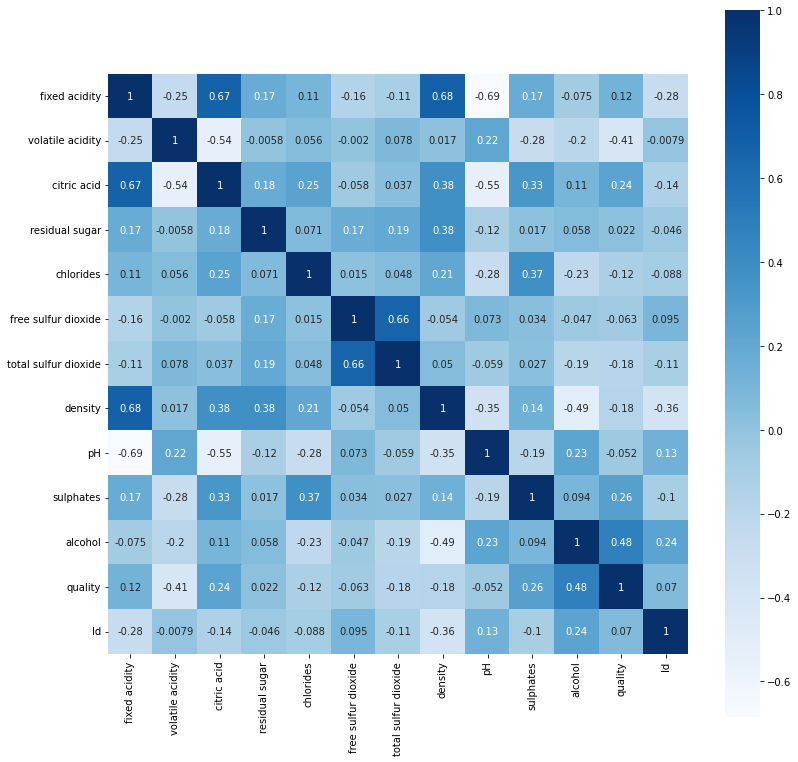

In [106]:
correlation = wines_df.corr()

fig = plt.subplots(figsize=(13,13))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Testing with only One independent variable.

In [107]:
for i in [ 'fixed acidity',	'volatile acidity','citric acid',	'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',	'density',	'pH','sulphates',	'alcohol']:
  x = np.array(wines_df[i])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  x_train=x_train.reshape(-1,1)
  x_test=x_test.reshape(-1,1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ",i," ",np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",i," ",accuracy_score(y_test,y_predict)*100)


The root mean squared error is  fixed acidity   0.8895528920902269
accuracy of the model is  fixed acidity   39.130434782608695
The root mean squared error is  volatile acidity   0.7283095376340308
accuracy of the model is  volatile acidity   52.17391304347826
The root mean squared error is  citric acid   0.8235659473079356
accuracy of the model is  citric acid   42.608695652173914
The root mean squared error is  residual sugar   0.8546547739343037
accuracy of the model is  residual sugar   40.0
The root mean squared error is  chlorides   0.8597269536210951
accuracy of the model is  chlorides   39.130434782608695
The root mean squared error is  free sulfur dioxide   0.8597269536210951
accuracy of the model is  free sulfur dioxide   39.130434782608695
The root mean squared error is  total sulfur dioxide   0.8697825815285305
accuracy of the model is  total sulfur dioxide   49.56521739130435
The root mean squared error is  density   0.8444190181781018
accuracy of the model is  density   4

Testing with Two variables

In [108]:
two_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(two_variables)-2+1): 
  x = np.array(wines_df[[two_variables[i],two_variables[i+1]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)


The root mean squared error is  0.7342550202638104
accuracy of the model is  51.30434782608696
The root mean squared error is  0.7283095376340308
accuracy of the model is  52.17391304347826
The root mean squared error is  0.8288284030721501
accuracy of the model is  41.73913043478261
The root mean squared error is  0.8546547739343037
accuracy of the model is  40.0
The root mean squared error is  0.8597269536210951
accuracy of the model is  39.130434782608695
The root mean squared error is  0.8697825815285305
accuracy of the model is  49.56521739130435
The root mean squared error is  0.7745966692414834
accuracy of the model is  53.04347826086957
The root mean squared error is  0.8235659473079356
accuracy of the model is  45.21739130434783
The root mean squared error is  0.7575704874652001
accuracy of the model is  50.43478260869565
The root mean squared error is  0.6527533657682196
accuracy of the model is  65.21739130434783


In [109]:
three_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(three_variables)-3+1): 
  x = np.array(wines_df[[three_variables[i],three_variables[i+1],three_variables[i+2]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.7283095376340308
accuracy of the model is  52.17391304347826
The root mean squared error is  0.7283095376340308
accuracy of the model is  52.17391304347826
The root mean squared error is  0.8288284030721501
accuracy of the model is  44.34782608695652
The root mean squared error is  0.8597269536210951
accuracy of the model is  39.130434782608695
The root mean squared error is  0.8697825815285305
accuracy of the model is  49.56521739130435
The root mean squared error is  0.8129388446970603
accuracy of the model is  51.30434782608696
The root mean squared error is  0.7689631641542312
accuracy of the model is  53.91304347826087
The root mean squared error is  0.7040256912308268
accuracy of the model is  58.26086956521739
The root mean squared error is  0.6527533657682196
accuracy of the model is  62.60869565217392


In [110]:
four_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(four_variables)-4+1): 
  x = np.array(wines_df[[four_variables[i],four_variables[i+1],four_variables[i+2],four_variables[i+3]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.7283095376340308
accuracy of the model is  52.17391304347826
The root mean squared error is  0.7401527456927534
accuracy of the model is  50.43478260869565
The root mean squared error is  0.8546547739343037
accuracy of the model is  42.608695652173914
The root mean squared error is  0.8747670497362986
accuracy of the model is  48.69565217391305
The root mean squared error is  0.7857425178439984
accuracy of the model is  51.30434782608696
The root mean squared error is  0.7857425178439984
accuracy of the model is  51.30434782608696
The root mean squared error is  0.7401527456927534
accuracy of the model is  58.26086956521739
The root mean squared error is  0.6724387801454332
accuracy of the model is  62.60869565217392


In [111]:
five_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(five_variables)-5+1): 
  x = np.array(wines_df[[five_variables[i],five_variables[i+1],five_variables[i+2],five_variables[i+3],five_variables[i+4]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)


The root mean squared error is  0.7401527456927534
accuracy of the model is  50.43478260869565
The root mean squared error is  0.7223151185146152
accuracy of the model is  53.04347826086957
The root mean squared error is  0.802170967356439
accuracy of the model is  53.91304347826087
The root mean squared error is  0.7857425178439984
accuracy of the model is  51.30434782608696
The root mean squared error is  0.7912565680749445
accuracy of the model is  50.43478260869565
The root mean squared error is  0.7162705342682119
accuracy of the model is  59.130434782608695
The root mean squared error is  0.6527533657682196
accuracy of the model is  60.0


In [112]:
six_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(six_variables)-6+1): 
  x = np.array(wines_df[[six_variables[i],six_variables[i+1],six_variables[i+2],six_variables[i+3],six_variables[i+4],six_variables[i+5]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.7223151185146152
accuracy of the model is  53.04347826086957
The root mean squared error is  0.7283095376340308
accuracy of the model is  60.0
The root mean squared error is  0.7342550202638104
accuracy of the model is  53.91304347826087
The root mean squared error is  0.7745966692414834
accuracy of the model is  53.04347826086957
The root mean squared error is  0.6724387801454332
accuracy of the model is  62.60869565217392
The root mean squared error is  0.6527533657682196
accuracy of the model is  60.0


In [113]:
seven_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(seven_variables)-7+1): 
  x = np.array(wines_df[[seven_variables[i],seven_variables[i+1],seven_variables[i+2],seven_variables[i+3],seven_variables[i+4],seven_variables[i+5],seven_variables[i+6]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.7101745039685362
accuracy of the model is  60.0
The root mean squared error is  0.6527533657682196
accuracy of the model is  62.60869565217392
The root mean squared error is  0.7342550202638104
accuracy of the model is  53.91304347826087
The root mean squared error is  0.6915640748081247
accuracy of the model is  60.0
The root mean squared error is  0.6255432421712243
accuracy of the model is  63.47826086956522


In [114]:
eight_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(eight_variables)-8+1): 
  x = np.array(wines_df[[eight_variables[i],eight_variables[i+1],eight_variables[i+2],eight_variables[i+3],eight_variables[i+4],eight_variables[i+5],eight_variables[i+6],eight_variables[i+7]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.6659416347320276
accuracy of the model is  60.86956521739131
The root mean squared error is  0.659380473395787
accuracy of the model is  61.73913043478261
The root mean squared error is  0.6392930878508801
accuracy of the model is  61.73913043478261
The root mean squared error is  0.6255432421712243
accuracy of the model is  63.47826086956522


In [115]:
nine_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(nine_variables)-9+1): 
  x = np.array(wines_df[[nine_variables[i],nine_variables[i+1],nine_variables[i+2],nine_variables[i+3],nine_variables[i+4],nine_variables[i+5],nine_variables[i+6],nine_variables[i+7],nine_variables[i+8]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.659380473395787
accuracy of the model is  61.73913043478261
The root mean squared error is  0.6460582824697986
accuracy of the model is  60.86956521739131
The root mean squared error is  0.6460582824697986
accuracy of the model is  60.86956521739131


In [116]:
ten_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(ten_variables)-10+1): 
  x = np.array(wines_df[[ten_variables[i],ten_variables[i+1],ten_variables[i+2],ten_variables[i+3],ten_variables[i+4],ten_variables[i+5],ten_variables[i+6],ten_variables[i+7],ten_variables[i+8],ten_variables[i+9]]])
  y = np.array(wines_df['quality'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.6255432421712243
accuracy of the model is  63.47826086956522
The root mean squared error is  0.6043321862224019
accuracy of the model is  63.47826086956522


In [117]:
eleven_variables= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in range(len(eleven_variables)-11+1): 
  x = wines_df[[eleven_variables[i],eleven_variables[i+1],eleven_variables[i+2],eleven_variables[i+3],eleven_variables[i+4],eleven_variables[i+5],eleven_variables[i+6],eleven_variables[i+7],eleven_variables[i+8],eleven_variables[i+9],eleven_variables[i+10]]]
  y = wines_df['quality']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)


The root mean squared error is  0.5970944139166224
accuracy of the model is  64.34782608695652


In [118]:
# removing fixed acidity, density and citric acid we are checking whether the overall accuracy increases

try_parameters= ['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']
for i in range(len(try_parameters)-8+1): 
  x = wines_df[[try_parameters[i],try_parameters[i+1],try_parameters[i+2],try_parameters[i+3],try_parameters[i+4],try_parameters[i+5],try_parameters[i+6],try_parameters[i+7]]]
  y = wines_df['quality']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.6043321862224019
accuracy of the model is  63.47826086956522


# Polynomial Regression

In [119]:
wines_df = pd.read_csv("/content/winequality-red_poly.csv")

In [120]:
# checking for null values
wines_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
fixed_2                 0
fixed_3                 0
fixed_4                 0
volatile_2              0
density_2               0
density_3               0
citric_2                0
residual_2              0
chlorides_2             0
free_2                  0
total_2                 0
pH_2                    0
sulphates_2             0
alcohol_2               0
dtype: int64

In [121]:
# checking for duplicated values
wines_df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [122]:
# removing duplicated values
wines_df=wines_df.drop_duplicates()
wines_df.duplicated()

0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool

In [131]:
# observing accuracy after cleaning the data

from sklearn.preprocessing import PolynomialFeatures
X = wines_df[['quality']]
y = wines_df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = PolynomialFeatures(degree= 2)
y_ = model.fit_transform(y)
y_test_ = model.fit_transform(y_test)
lg = LinearRegression()
lg.fit(y_,X)
predicted_data = lg.predict(y_test_)
predicted_data = np.round_(predicted_data)
print("The root mean squared error is ", np.sqrt(mean_squared_error(X_test,predicted_data)))
print("accuracy of the model is ",accuracy_score(X_test,predicted_data)*100)

The root mean squared error is  0.7122871199007256
accuracy of the model is  58.08823529411765


In [124]:
# Here density_2 is the square of the density and density_3 is the cube. No change in output

try_parameters= ['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol','density_2','density_3']
for i in range(len(try_parameters)-10+1): 
  x = wines_df[[try_parameters[i],try_parameters[i+1],try_parameters[i+2],try_parameters[i+3],try_parameters[i+4],try_parameters[i+5],try_parameters[i+6],try_parameters[i+7],try_parameters[i+8],try_parameters[i+9]]]
  y = wines_df['quality']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.7174300539794393
accuracy of the model is  58.82352941176471


In [125]:
# Here fixed_2 is the square of the fixed acidity. No change in output

try_parameters= ['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol','fixed_2']
for i in range(len(try_parameters)-9+1): 
  x = wines_df[[try_parameters[i],try_parameters[i+1],try_parameters[i+2],try_parameters[i+3],try_parameters[i+4],try_parameters[i+5],try_parameters[i+6],try_parameters[i+7],try_parameters[i+8]]]
  y = wines_df['quality']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.7174300539794393
accuracy of the model is  58.82352941176471


In [126]:
# Checking each squared column accuracy by polynomial
# Square

try_parameters= ['fixed_2','volatile_2','density_2','citric_2','residual_2','chlorides_2','free_2','total_2','pH_2','sulphates_2','alcohol_2']
for i in range(len(try_parameters)-1+1): 
  x = wines_df[[try_parameters[i]]]
  y = wines_df['quality']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.8179961167749047
accuracy of the model is  49.26470588235294
The root mean squared error is  0.8043996665398437
accuracy of the model is  49.26470588235294
The root mean squared error is  0.8134892168199607
accuracy of the model is  44.85294117647059
The root mean squared error is  0.8574929257125442
accuracy of the model is  42.64705882352941
The root mean squared error is  0.8043996665398437
accuracy of the model is  47.794117647058826
The root mean squared error is  0.7952062255644573
accuracy of the model is  49.26470588235294
The root mean squared error is  0.8043996665398437
accuracy of the model is  47.794117647058826
The root mean squared error is  0.7859052479933758
accuracy of the model is  50.73529411764706
The root mean squared error is  0.8134892168199607
accuracy of the model is  44.85294117647059
The root mean squared error is  0.8134892168199607
accuracy of the model is  46.32352941176471
The root mean squared error is  0.79981615534630

In [127]:
# Including all squared columns of the data to perform polynomial regression(all columns accuracy)

square_parameters= ['fixed_2','volatile_2','density_2','citric_2','residual_2','chlorides_2','free_2','total_2','pH_2','sulphates_2','alcohol_2']
for i in range(len(square_parameters)-11+1): 
  x = wines_df[[square_parameters[i],square_parameters[i+1],square_parameters[i+2],square_parameters[i+3],square_parameters[i+4],square_parameters[i+5],square_parameters[i+6],square_parameters[i+7],square_parameters[i+8],square_parameters[i+9],square_parameters[i+10]]]
  y = wines_df['quality']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.6966305460192359
accuracy of the model is  59.55882352941176


In [128]:
# Removing and considering some columns to check if there is any change in accuracy

random_parameters= ['fixed_2','volatile_2','citric_2','residual_2','chlorides_2','free_2','total sulfur dioxide','density_2','pH','sulphates','alcohol']
for i in range(len(random_parameters)-11+1): 
  x = wines_df[[random_parameters[i],random_parameters[i+1],random_parameters[i+2],random_parameters[i+3],random_parameters[i+4],random_parameters[i+5],random_parameters[i+6],random_parameters[i+7],random_parameters[i+8],random_parameters[i+9],random_parameters[i+10]]]
  y = wines_df['quality']
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  y_predict = regression_model.predict(x_test)
  y_predict = np.round(y_predict)
  print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_predict)))
  print("accuracy of the model is ",accuracy_score(y_test,y_predict)*100)

The root mean squared error is  0.7122871199007256
accuracy of the model is  57.35294117647059


In [132]:
# observing accuracy without cleaning the data.

from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('/content/winequality-red_poly.csv')
X = df[['quality']]
y = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = PolynomialFeatures(degree= 2)
y_ = model.fit_transform(y)
y_test_ = model.fit_transform(y_test)
lg = LinearRegression()
lg.fit(y_,X)
predicted_data = lg.predict(y_test_)
predicted_data = np.round_(predicted_data)
print("The root mean squared error is ", np.sqrt(mean_squared_error(X_test,predicted_data)))
print("accuracy of the model is ",accuracy_score(X_test,predicted_data)*100)

The root mean squared error is  0.7026734661277598
accuracy of the model is  60.0
